In [121]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [122]:
articles = pd.read_csv("../../data/articles.csv", delimiter="|", quotechar="^", header=0, parse_dates=["scrapdate"])

In [123]:
# generate fake "isFake" values
articles["isFake"] = np.random.choice(np.array([True, False]), len(articles))
# generate fake "pubdate" values
rnd_dates = pd.date_range(start='11/6/2017', end='11/8/2017', freq="30min") # US date format
articles["pubdate"] = np.random.choice(rnd_dates, len(articles))

# if it is fake why don't we generate influences also? just for learn how to draw nice plots
articles["readers"] = np.random.randint(low=100, high=100000, size=len(articles))
articles

,url,scrapdate,pubdate,content,comments,isFake,readers
0,https://www.wprost.pl/kraj/10084881/warszawska...,2018-01-19 13:31:45.187975,2017-11-06 09:30:00,\r\n„Wprowadzamy do menu prawdziwe superfood! ...,NaN,False,19987
1,http://warszawa.naszemiasto.pl/tag/mleko-kobie...,2018-01-19 13:31:45.347516,2017-11-06 08:00:00,LogowanieNie masz jeszcze konta?Wybierz region...,NaN,True,3400
2,https://www.kozaczek.pl/plotka/ze-co-warszawsk...,2018-01-19 13:31:45.492913,2017-11-07 19:30:00,"""Prawdziwe superfood"" - piszą na Twitterze.Ofe...",\ndodasz komentarz jako\n - jeżeli chcesz zare...,True,35832
3,https://www.papilot.pl/lifestyle-ciekawostki/z...,2018-01-19 13:31:45.614054,2017-11-07 19:30:00,"Bary, kawiarnie, restauracje oraz wszelkiego r...",NaN,False,90760
4,http://www.wirtualnemedia.pl/artykul/mleko-kob...,2018-01-19 13:31:45.646101,2017-11-07 19:00:00,\r\n \r\n ...,NaN,False,46398
5,http://superbiz.se.pl/wiadomosci-biz/nie-kupis...,2018-01-19 13:31:45.852587,2017-11-06 21:00:00,"W ostatnich dniach media obiegła wiadomość, że...",NaN,False,8409
6,http://www.se.pl/wiadomosci/polska/warszawa-za...,2018-01-19 13:31:45.876655,2017-11-07 16:00:00,Specyficzna reklama czy innowacyjny pomysł na ...,NaN,False,81877
7,https://web.facebook.com/ZonaKrawca/posts/3691...,2018-01-19 13:31:45.898383,2017-11-07 05:30:00,"To help personalize content, tailor and measur...",NaN,True,96289
8,http://www.portalniezalezny.pl/szok-kawa-kobie...,2018-01-19 13:31:46.001019,2017-11-06 01:00:00,Jedna z warszawskich kawiarni zszokowała swoic...,NaN,True,54677
9,https://wio.waw.pl/artykul/kobiece-mleko-w-ofe...,2018-01-19 13:31:46.130334,2017-11-07 18:30:00,\r\n \r...,NaN,False,28567


In [124]:
fakes = articles[articles["isFake"] == True]
corrections = articles[articles["isFake"] == False]
corrections

,url,scrapdate,pubdate,content,comments,isFake,readers
0,https://www.wprost.pl/kraj/10084881/warszawska...,2018-01-19 13:31:45.187975,2017-11-06 09:30:00,\r\n„Wprowadzamy do menu prawdziwe superfood! ...,NaN,False,19987
3,https://www.papilot.pl/lifestyle-ciekawostki/z...,2018-01-19 13:31:45.614054,2017-11-07 19:30:00,"Bary, kawiarnie, restauracje oraz wszelkiego r...",NaN,False,90760
4,http://www.wirtualnemedia.pl/artykul/mleko-kob...,2018-01-19 13:31:45.646101,2017-11-07 19:00:00,\r\n \r\n ...,NaN,False,46398
5,http://superbiz.se.pl/wiadomosci-biz/nie-kupis...,2018-01-19 13:31:45.852587,2017-11-06 21:00:00,"W ostatnich dniach media obiegła wiadomość, że...",NaN,False,8409
6,http://www.se.pl/wiadomosci/polska/warszawa-za...,2018-01-19 13:31:45.876655,2017-11-07 16:00:00,Specyficzna reklama czy innowacyjny pomysł na ...,NaN,False,81877
9,https://wio.waw.pl/artykul/kobiece-mleko-w-ofe...,2018-01-19 13:31:46.130334,2017-11-07 18:30:00,\r\n \r...,NaN,False,28567
10,"http://polki.pl/magazyn/o-tym-sie-mowi,kobiece...",2018-01-19 13:31:46.255150,2017-11-06 20:00:00,\nW miniony weekend na facebookowym profilu wa...,NaN,False,29250
12,https://www.rmfmaxxx.pl/news/Warszawska-kawiar...,2018-01-19 13:31:46.454200,2017-11-07 21:30:00,NaN,NaN,False,42355
15,http://www.dzienniklodzki.pl/strefa-biznesu/wi...,2018-01-19 13:31:46.870824,2017-11-07 02:30:00,\n ...,NaN,False,33273
16,https://moi-mili.pl/warszawska-kawiarnia-wprow...,2018-01-19 13:31:47.108293,2017-11-07 21:30:00,"Karmienie piersią z Leonem mi nie wyszło, za t...","komentarzy do ""Warszawska kawiarnia wprowadz...",False,9019


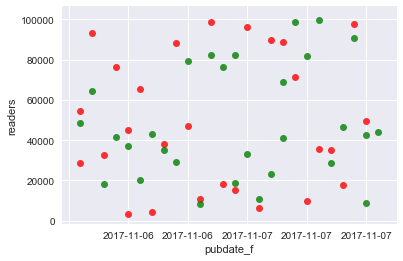

In [125]:
# seaborn does not support datetime, but there is an ugly hack
# src: https://stackoverflow.com/questions/44354614/seaborn-regplot-using-datetime64-as-the-x-axis
def ugly_date_hack(df):
    df = df.sort_values('pubdate')
    df['pubdate_f'] = pd.factorize(df['pubdate'])[0] + 1
    mapping = dict(zip(df['pubdate_f'], df['pubdate'].dt.date))
    labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
    return (df, labels)
    
fakes, labels = ugly_date_hack(fakes)
corrections, labels = ugly_date_hack(corrections)
ax = sns.regplot('pubdate_f', 'readers', data=fakes, fit_reg=False, color="red")
ay = sns.regplot('pubdate_f', 'readers', data=corrections, fit_reg=False, color="green")
ax.set_xticklabels(labels)